In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV
import joblib

In [2]:
data=pd.read_csv("C:/Users/Krushil Dobariya/PYTHON/PROJECTS/AIML PROJECT/Data/Preprocess-Dataset.csv")

In [3]:
data.head(1)

,Unnamed: 0,Age,Attrition,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,...,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41,1,0,1,0,2,3,2,0,...,5993,19479,8,1,0,8,6,4,0,5


In [4]:
data.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'Department', 'DistanceFromHome',
       'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
X = data.drop(columns=['Attrition','Unnamed: 0'])
y = data['Attrition']

In [66]:
X.columns

Index(['Age', 'Department', 'DistanceFromHome', 'EducationField',
       'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'StockOptionLevel',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
X_train1, X_test1, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train1)
X_test = scaler.transform(X_test1)

In [7]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [8]:
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)
    
    results[model_name] = {
        "accuracy": accuracy,
        "confusion_matrix": cm,
        "classification_report": cr
    }


In [74]:
for model_name, model in models.items():
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.savefig(f"C:/Users/Krushil Dobariya/PYTHON/PROJECTS/AIML PROJECT/Images/{model_name}_confusion_matrix.png", format='png')
    plt.close()

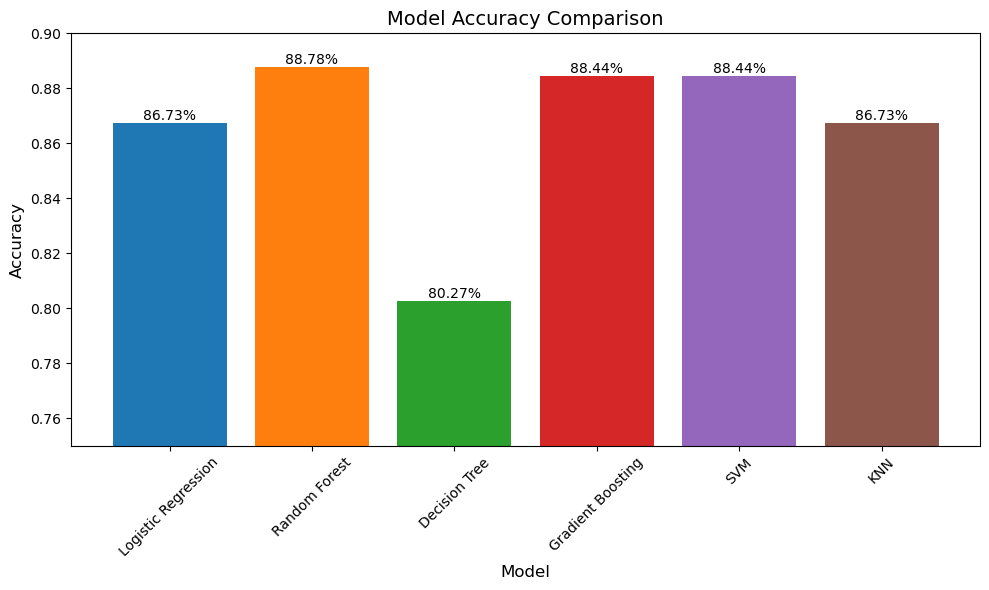

In [76]:
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b'])
plt.title('Model Accuracy Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim(0.75, 0.9)
plt.xticks(rotation=45)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2%}',
             ha='center', va='bottom')

plt.tight_layout()
plt.savefig("C:/Users/Krushil Dobariya/PYTHON/PROJECTS/AIML PROJECT/Images/model_comparison.png")
plt.show()

In [9]:
for model_name, result in results.items():
    print(f"Model: {model_name}")
    print(f"Accuracy: {result['accuracy']:.4f}")
    print(f"Confusion Matrix:\n{result['confusion_matrix']}")
    print(f"Classification Report:\n{result['classification_report']}")
    print("-" * 50)

Model: Logistic Regression
Accuracy: 0.8673
Confusion Matrix:
[[246   9]
 [ 30   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       255
           1       0.50      0.23      0.32        39

    accuracy                           0.87       294
   macro avg       0.70      0.60      0.62       294
weighted avg       0.84      0.87      0.85       294

--------------------------------------------------
Model: Random Forest
Accuracy: 0.8878
Confusion Matrix:
[[255   0]
 [ 33   6]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       255
           1       1.00      0.15      0.27        39

    accuracy                           0.89       294
   macro avg       0.94      0.58      0.60       294
weighted avg       0.90      0.89      0.85       294

--------------------------------------------------
Model: Decision Tree
Accuracy: 0.8

In [10]:
best_model_name = max(results, key=lambda model: results[model]['accuracy'])
best_model_accuracy = results[best_model_name]['accuracy']

print(f"The best model based on accuracy is: {best_model_name}")
print(f"Accuracy: {best_model_accuracy:.4f}")

The best model based on accuracy is: Random Forest
Accuracy: 0.8878


In [52]:
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X, y)

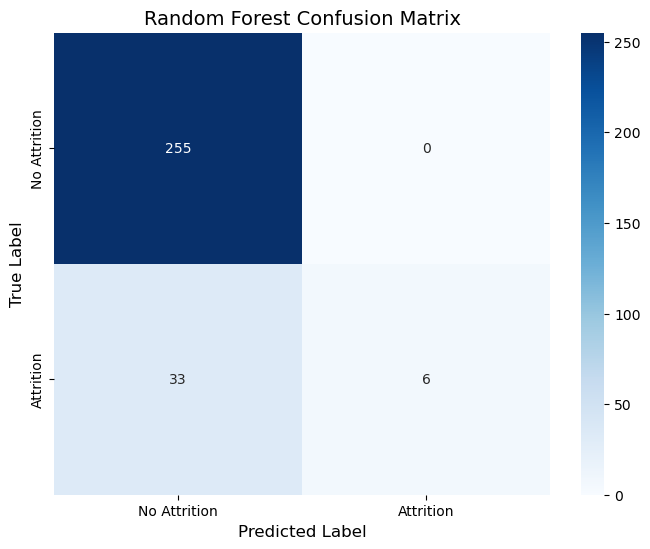

In [78]:
best_result = results['Random Forest']
cm = best_result['confusion_matrix']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['No Attrition', 'Attrition'],
            yticklabels=['No Attrition', 'Attrition'])
plt.title('Random Forest Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.savefig("C:/Users/Krushil Dobariya/PYTHON/PROJECTS/AIML PROJECT/Images/best_model_confusion_matrix.png")
plt.show()

C:\Users\Krushil Dobariya\AppData\Local\Temp\ipykernel_29928\3424504383.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')


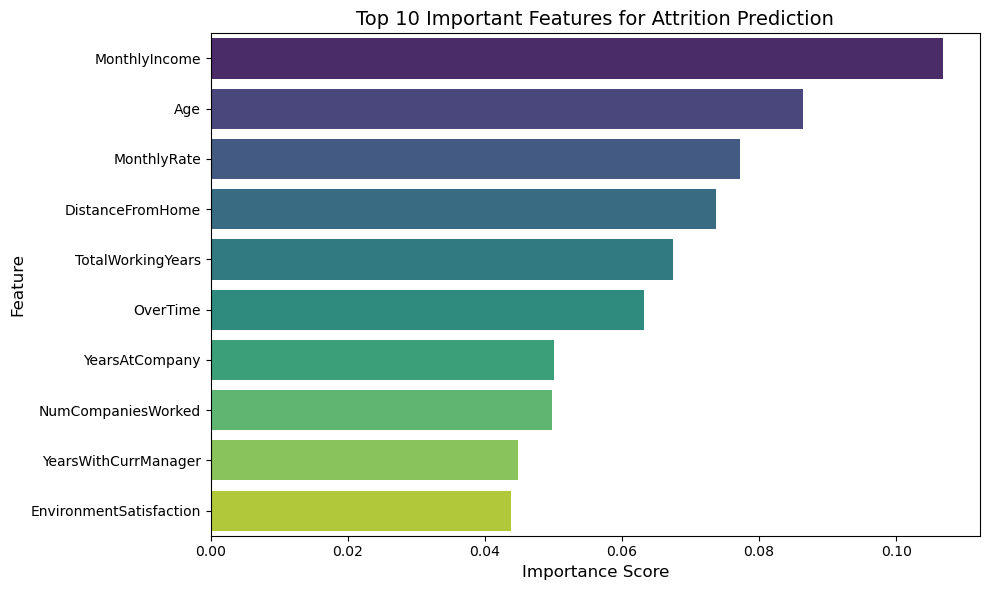

In [80]:
feature_importances = best_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis')
plt.title('Top 10 Important Features for Attrition Prediction', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.savefig("C:/Users/Krushil Dobariya/PYTHON/PROJECTS/AIML PROJECT/Images/feature_importance.png")
plt.show()

C:\Users\Krushil Dobariya\AppData\Local\Temp\ipykernel_29928\2313011941.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette=['#1f77b4', '#ff7f0e'])


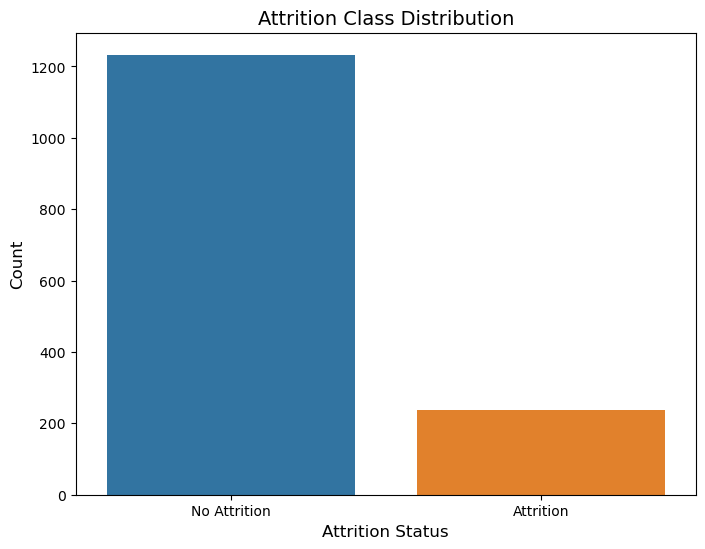

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(x=y, palette=['#1f77b4', '#ff7f0e'])
plt.title('Attrition Class Distribution', fontsize=14)
plt.xlabel('Attrition Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks([0, 1], ['No Attrition', 'Attrition'])
plt.savefig("C:/Users/Krushil Dobariya/PYTHON/PROJECTS/AIML PROJECT/Images/class_distribution.png")
plt.show()

In [64]:
joblib.dump(best_model,"C:/Users/Krushil Dobariya/PYTHON/PROJECTS/AIML PROJECT/models/model(rf).pkl")

['C:/Users/Krushil Dobariya/PYTHON/PROJECTS/AIML PROJECT/models/model(rf).pkl']